# Análises descritiva e diagnóstica do dataset Titanic

#### Perguntas a serem respondidas:
* Quantas mulheres e quantos homens havia no navio, por classe e por sexo?
* Quantas mulheres e quantos homens sobreviveram?
* Os passageiros das primeiras classes tiveram maiores chances de sobrevivência?
* As mulheres tiveram maior chance de sobrevivência que os homens?
* As mulheres da primeira classe tiveram maior chance de sobrevivência que as mulheres da terceira classe?
* Crianças tiveram uma taxa maior de sobrevivência?
* Crianças da primeira e segunda classe sobreviveram mais que as crianças da terceira classe?

#### DICIONÁRIO DE DADOS
* Survived (Sobreviveu): 0 = Não, 1 = Sim
* Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
* Sex (Sexo): Sexo do passageiro
* Age (Idade): Idade em anos
* Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
* Parch: Quantidade de pais / crianças a bordo do Titanic
* Ticket (Bilhete): Número do bilhete de embarque
* Fare (Tarifa): Tarifa paga pelo Passageiro
* Cabin (Cabine): Número de cabine
* Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

vcolor2 = ['tab:blue','tab:red','tab:green','tab:orange','tab:purple','tab:brown','tab:gray','tab:pink','tab:olive','tab:cyan']

In [71]:
def criar_grafico_pizza(df, titulo):
    df.plot(kind = 'pie', figsize = (15,5), legend = None, title = titulo, subplots = True, shadow = True)
    plt.show()
    
def criar_grafico_pizza_porcentagens(df, titulo):
    df.plot(kind = 'pie', figsize = (15,5), legend = None, title = titulo, subplots = True, autopct = '%1.1f%%')
    plt.show()

In [3]:
dados = pd.read_csv('train.csv', sep = ',')

In [4]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# vamos descobrir a quantidade de pessoas por classe no navio
#people_class1 = dados[dados['Pclass'] == 1]['Pclass'].value_counts()
people_class1= len(dados[dados['Pclass'] == 1])
people_class1

216

In [6]:
people_class2= len(dados[dados['Pclass'] == 2])
people_class2

184

In [7]:
people_class3= len(dados[dados['Pclass'] == 3])
people_class3

491

In [8]:
people_in_classes = pd.DataFrame([people_class1, people_class2, people_class3]); people_in_classes

,0
0,216
1,184
2,491


In [9]:
people_in_classes.index = ['Classe 1', 'Classe 2', 'Classe 3']
people_in_classes

,0
Classe 1,216
Classe 2,184
Classe 3,491


Text(0, 0.5, 'Número de pessoas')

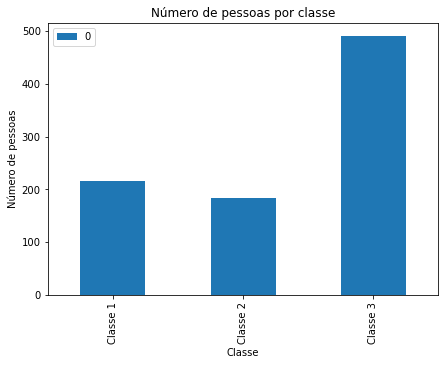

In [10]:
people_in_classes.plot(kind = 'bar', figsize = (7,5), title = 'Número de pessoas por classe')
plt.xlabel('Classe')
plt.ylabel('Número de pessoas')

In [11]:
# descobrindo o número de sobreviventes e de mortos por classe
survived_class = dados[dados['Survived'] == 1]['Pclass'].value_counts()
dead_class = dados[dados['Survived'] == 0]['Pclass'].value_counts()

In [12]:
# criando um dataframe com os dados de sobreviventes x mortos por classe
df_classes = pd.DataFrame([survived_class, dead_class])
df_classes

,1,2,3
Pclass,136,87,119
Pclass,80,97,372


In [13]:
# renomeando os índices e as colunas
df_classes.index = ['Sobreviveram', 'Morreram']
df_classes.columns = ['Classe 1', 'Classe 2', 'Classe 3']
df_classes

,Classe 1,Classe 2,Classe 3
Sobreviveram,136,87,119
Morreram,80,97,372


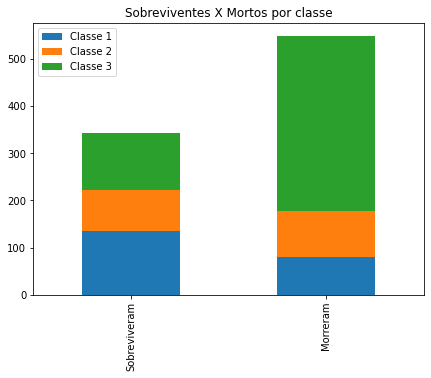

In [14]:
# gráfico com os dados de sobreviventes
df_classes.plot(kind = 'bar', stacked = True, figsize = (7,5), title = 'Sobreviventes X Mortos por classe')
plt.show()

In [15]:
df_classes

,Classe 1,Classe 2,Classe 3
Sobreviveram,136,87,119
Morreram,80,97,372


In [16]:
# porcentagem de sobreviventes por classe
porcentagem_classe1 = df_classes.iloc[0,0]/df_classes.iloc[:,0].sum()*100
porcentagem_classe2 = df_classes.iloc[0,1]/df_classes.iloc[:,1].sum()*100
porcentagem_classe3 = df_classes.iloc[0,2]/df_classes.iloc[:,2].sum()*100

In [17]:
print("Porcentagem de sobreviventes na primeira classe: {}%".format(porcentagem_classe1.round(2)))
print("Porcentagem de sobreviventes na segunda classe: {}%".format(porcentagem_classe2.round(2)))
print("Porcentagem de sobreviventes na terceira classe: {}%".format(porcentagem_classe3.round(2)))

Porcentagem de sobreviventes na primeira classe: 62.96%
Porcentagem de sobreviventes na segunda classe: 47.28%
Porcentagem de sobreviventes na terceira classe: 24.24%


In [18]:
# dataframe com as porcentagens de sobreviventes
df_porcentagens = pd.DataFrame([porcentagem_classe1, porcentagem_classe2, porcentagem_classe3])
df_porcentagens

,0
0,62.962963
1,47.282609
2,24.236253


In [19]:
# renomeando índices e coluna
df_porcentagens.index = ['Classe 1', 'Classe 2', 'Classe 3']
df_porcentagens.columns = ['Porcentagem de sobreviventes']; df_porcentagens
#df_porcentagens.columns.name = 'Classe'
#df_porcentagens2 = df_porcentagens.copy()
#df_porcentagens2.pivot_table(index = 'Classe', values = 'Porcentagem de sobreviventes', aggfunc = 'count')

,Porcentagem de sobreviventes
Classe 1,62.962963
Classe 2,47.282609
Classe 3,24.236253


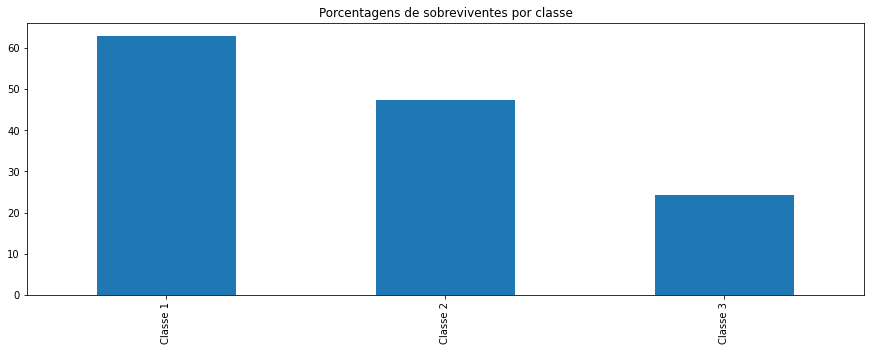

In [20]:
# gráfico com as porcentagens de sobreviventes por classe
df_porcentagens.plot(kind = 'bar', figsize = (15,5), legend = None, title = 'Porcentagens de sobreviventes por classe',
                    color = vcolor2)
plt.show()

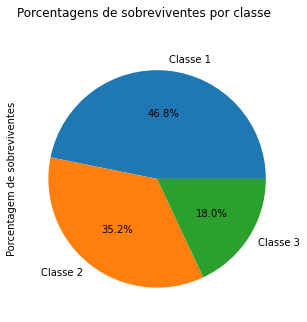

In [70]:
# gráfico de pizza com as porcentagens de sobreviventes por classe
#df_porcentagens.plot(kind = 'pie', figsize = (15,5), legend = None, title = 'Porcentagens de sobreviventes por classe', subplots = True)
#plt.show()
criar_grafico_pizza_porcentagens(df_porcentagens, 'Porcentagens de sobreviventes por classe')

In [22]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### As mulheres tiveram maior chance de sobrevivência que os homens?

In [23]:
# número de pessoas no navio de acordo com o sexo
dados['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
# verificando os sobreviventes X mortos de acordo com o sexo
sobreviventes_sexo = dados[dados['Survived'] == 1]['Sex'].value_counts()
sobreviventes_sexo

female    233
male      109
Name: Sex, dtype: int64

In [25]:
mortos_sexo = dados[dados['Survived'] == 0]['Sex'].value_counts()
mortos_sexo

male      468
female     81
Name: Sex, dtype: int64

In [26]:
df_sexo = pd.DataFrame([sobreviventes_sexo, mortos_sexo])
df_sexo

,female,male
Sex,233,109
Sex,81,468


In [27]:
# alterando nomes das colunas e das linhas
df_sexo.index = ['sobreviventes', 'mortos']
df_sexo.columns = ['mulheres', 'homens']
df_sexo

,mulheres,homens
sobreviventes,233,109
mortos,81,468


314

In [130]:
# porcentagens de sobreviventes para homens e mulheres
percentual_mulheres = ((df_sexo['mulheres']/df_sexo['mulheres'].sum()) * 100).round(2)
percentual_homens = ((df_sexo['homens']/df_sexo['mulheres'].sum()) * 100).round(2)

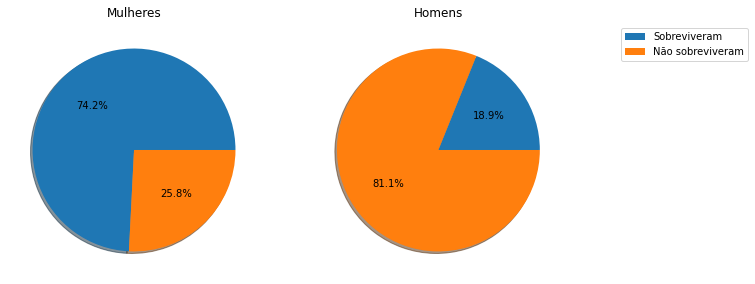

In [140]:
# plotando gráfico de pizza com os dados de mulheres sobreviventes x mortos
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
explode = (0.1, 0, 0, 0) 

ax1.pie(percentual_mulheres, shadow = True, autopct = '%1.1f%%')
ax2.pie(percentual_homens, shadow = True, autopct = '%1.1f%%')

ax1.set(title = 'Mulheres')
ax2.set(title = 'Homens')
plt.legend(['Sobreviveram', 'Não sobreviveram'], bbox_to_anchor=(1.2,1))
plt.show()

In [30]:
df_sexo

,mulheres,homens
sobreviventes,233,109
mortos,81,468


In [31]:
# porcentagens de sobreviventes x mortos por sexo
mulheres_sobreviventes = df_sexo.iloc[0,0]/df_sexo.iloc[:,0].sum() * 100
homens_sobreviventes = df_sexo.iloc[0,1]/df_sexo.iloc[:,1].sum() * 100

In [32]:
print(f"Porcentagem de mulheres que sobreviveram: {mulheres_sobreviventes.round(2)}%")
print(f"Porcentagem de homens que sobreviveram: {homens_sobreviventes.round(2)}%")

Porcentagem de mulheres que sobreviveram: 74.2%
Porcentagem de homens que sobreviveram: 18.89%


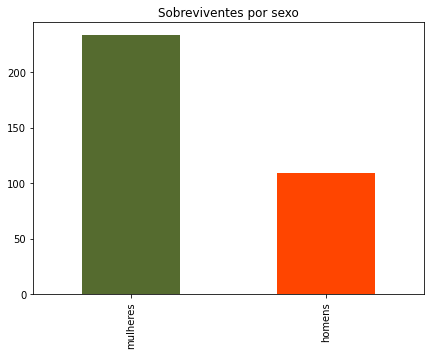

In [33]:
# plotando gráfico de barras com o número de sobreviventes por sexo
df_sexo.iloc[0,:].plot(kind = 'bar', figsize = (7,5), title = 'Sobreviventes por sexo', color = ['#556B2F','#FF4500'])
plt.show()

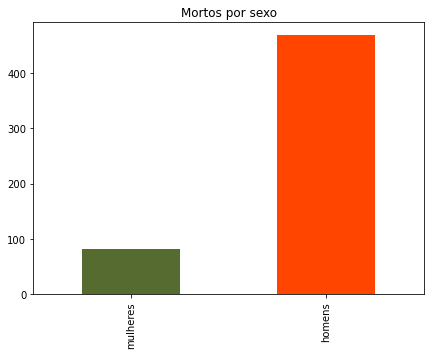

In [34]:
# plotando gráfico de barras com o número de mortos por sexo
df_sexo.iloc[1,:].plot(kind = 'bar', figsize = (7,5), title = 'Mortos por sexo', color = ['#556B2F','#FF4500'])
plt.show()

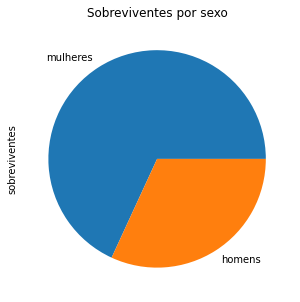

In [35]:
# plotando gráfico de pizza com a porcentagem de sobreviventes por sexo
df_sexo.iloc[0,:].plot(kind = 'pie', figsize = (7,5), title = 'Sobreviventes por sexo')
plt.show()

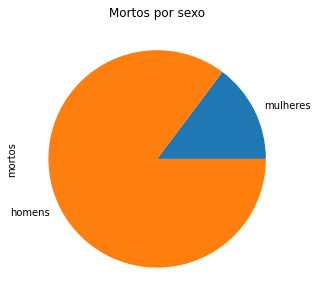

In [36]:
# plotando gráfico de pizza com a porcentagem de sobreviventes por sexo
df_sexo.iloc[1,:].plot(kind = 'pie', figsize = (7,5), title = 'Mortos por sexo')
plt.show()

### As mulheres da primeira classe tiveram maior chance de sobrevivência que as mulheres da terceira classe?

In [37]:
# quantidade de mulheres por classe no navio
mulheres = dados[dados['Sex'] == 'female']['Pclass'].value_counts()
mulheres.sort_index()

1     94
2     76
3    144
Name: Pclass, dtype: int64

In [38]:
# número de mulheres sobreviventes por classe
mulheres_sobreviventes_classe1 = dados[(dados['Survived'] == 1) & (dados['Sex'] == 'female')]['Pclass'].value_counts()
mulheres_sobreviventes_classe1.sort_index()

1    91
2    70
3    72
Name: Pclass, dtype: int64

In [39]:
# mulheres mortas por classe
mulheres_mortas_classe1 = dados[(dados['Survived'] == 0) & (dados['Sex'] == 'female')]['Pclass'].value_counts()
mulheres_mortas_classe1.sort_index()

1     3
2     6
3    72
Name: Pclass, dtype: int64

In [40]:
# montando o dataframe com dados de mulheres sobreviventes x mortas por classe
df_mulheres = pd.DataFrame([mulheres_sobreviventes_classe1, mulheres_mortas_classe1], index = ['Sobreviventes', 'Mortas'])
df_mulheres

,1,2,3
Sobreviventes,91,70,72
Mortas,3,6,72


In [41]:
df_mulheres.columns = ['Classe 1', 'Classe 2', 'Classe 3']
df_mulheres

,Classe 1,Classe 2,Classe 3
Sobreviventes,91,70,72
Mortas,3,6,72


In [42]:
# porcentagem de mulheres sobreviventes por classe
porcentagem_mulheres_sobreviventes_classe1 = df_mulheres.iloc[0,0]/df_mulheres.iloc[:,0].sum() * 100
porcentagem_mulheres_sobreviventes_classe2 = df_mulheres.iloc[0,1]/df_mulheres.iloc[:,1].sum() * 100
porcentagem_mulheres_sobreviventes_classe3 = df_mulheres.iloc[0,2]/df_mulheres.iloc[:,2].sum() * 100

In [43]:
print(f"Porcentagem de mulheres sobreviventes na primeira classe: {porcentagem_mulheres_sobreviventes_classe1.round(2)}")
print(f"Porcentagem de mulheres sobreviventes na primeira classe: {porcentagem_mulheres_sobreviventes_classe2.round(2)}")
print(f"Porcentagem de mulheres sobreviventes na primeira classe: {porcentagem_mulheres_sobreviventes_classe3.round(2)}")

Porcentagem de mulheres sobreviventes na primeira classe: 96.81
Porcentagem de mulheres sobreviventes na primeira classe: 92.11
Porcentagem de mulheres sobreviventes na primeira classe: 50.0


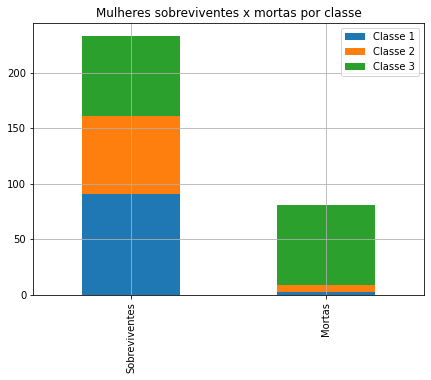

In [44]:
### colocar o gráfico com o número de mulheres no navio ao lado
# gráfico de barras com o número de mulheres sobreviventes x mortas por classe
df_mulheres.plot(kind = 'bar', stacked = True, figsize = (7,5), title = 'Mulheres sobreviventes x mortas por classe')
plt.grid()
plt.show()

In [45]:
# dataframe com as porcentagens
df_porcentagens_mulheres = pd.DataFrame([porcentagem_classe1, porcentagem_classe2, porcentagem_classe3], 
                                        index = ['Classe 1', 'Classe 2', 'Classe 3'], columns=['Porcentagem'])
df_porcentagens_mulheres

,Porcentagem
Classe 1,62.962963
Classe 2,47.282609
Classe 3,24.236253


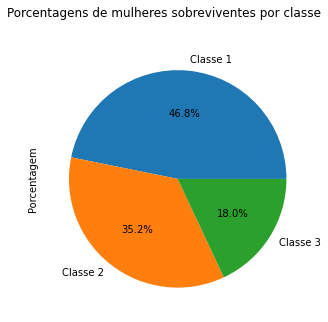

In [46]:
# gráfico de pizza com as porcentagens de mulheres sobreviventes por classe
criar_grafico_pizza_porcentagens(df_porcentagens_mulheres, 'Porcentagens de mulheres sobreviventes por classe')

### Crianças tiveram uma taxa maior de sobrevivência?

In [47]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


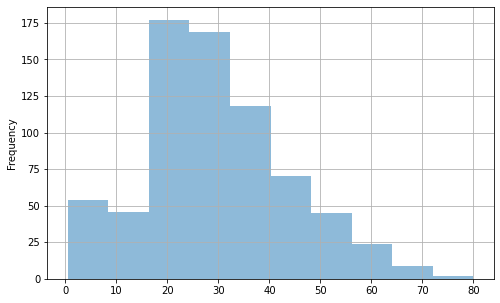

In [48]:
# histograma das idades
dados['Age'].plot(kind = 'hist', alpha = 0.5, figsize = (8,5))
plt.grid()
plt.show()

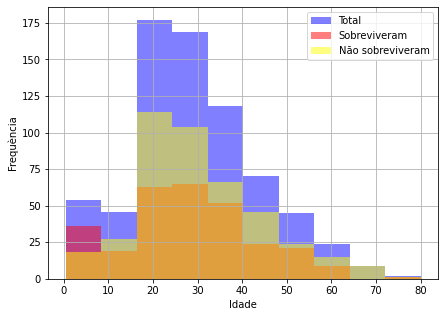

In [49]:
# criando um DF a partir de um dicionário, para verificarmos a idade dos sobreviventes e mortos
df_idades_sobreviventes = pd.DataFrame({'Total': dados['Age'],
                                       'Não sobreviveram': dados[dados['Survived'] == 0]['Age'],
                                       'Sobreviveram': dados[dados['Survived'] == 1]['Age']},
                                      columns = ['Total', 'Sobreviveram', 'Não sobreviveram'])
df_idades_sobreviventes.plot.hist(bins = 10, alpha = 0.5, figsize = (7,5), color = ('blue', 'red', 'yellow'))
plt.grid()
plt.xlabel('Idade')
plt.ylabel('Frequència')
plt.show()

In [50]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# verificar se há dados nulos na coluna idade
print(f'Número de registros nulos na coluna idade: {dados.Age.isnull().sum()}')
print(f'Número de registros não nulos na coluna idade: {(~dados.Age.isnull()).sum()}')

Número de registros nulos na coluna idade: 177
Número de registros não nulos na coluna idade: 714


In [52]:
# faremos uma cópia do dataframe para excluirmos as linhas com registros nulos, mas sem alterarmos o dataset original
dados_novos = dados.copy()
dados_novos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# aqui excluimos as linhas de dados_novos, de acordo com seu índice, onde o valor da coluna Age for nulo
dados_novos.drop(dados_novos[dados_novos.Age.isnull() == True].index, axis = 0, inplace = True)

In [54]:
# Verificando novamente o número de registros nulos na coluna Age
print(f'Número de registros nulos na coluna idade: {dados_novos.Age.isnull().sum()}')
print(f'Número de registros não nulos na coluna idade: {(~dados_novos.Age.isnull()).sum()}')

Número de registros nulos na coluna idade: 0
Número de registros não nulos na coluna idade: 714


In [55]:
# vamos criar uma Series contendo o índice de mortalidade para crianças e não crianças
# vamos considerar crianças aquelas abaixo dos 12 anos

# o método loc recebe como parâmetros a nossa condição(aí pegamos o seu índice, pois o loc busca índices numéricos) e a coluna que 
# vai receber o conteúdo
#dados_novos['Criança_adulto'] = 0
dados_novos.loc[dados_novos[dados_novos.Age < 12].index, 'Criança_adulto'] = 'Criança'
dados_novos.loc[dados_novos[dados_novos.Age >= 12].index, 'Criança_adulto'] = 'Não crianças'
dados_novos.groupby('Criança_adulto')['Survived'].mean()

Criança_adulto
Criança         0.573529
Não crianças    0.388545
Name: Survived, dtype: float64

In [56]:
dados_novos.groupby('Criança_adulto')[['Survived']].mean().round(2)

,Survived
Criança_adulto,
Criança,0.57
Não crianças,0.39


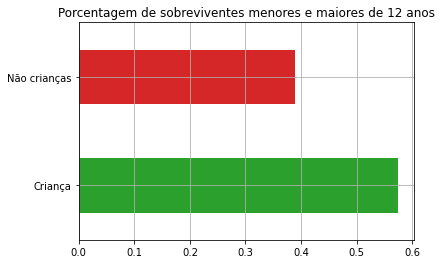

In [57]:
dados_novos.groupby('Criança_adulto')['Survived'].mean().plot.barh(title = 'Porcentagem de sobreviventes menores e maiores de 12 anos', 
                                                                   color = ('tab:green', 'tab:red')).set_ylabel('')
plt.grid()
plt.show()

In [58]:
# total de crianças no navio, por classe
total_criancas_classe = dados_novos[dados_novos['Criança_adulto'] == 'Criança']['Pclass'].value_counts()
total_criancas_classe.sort_index()

1     4
2    17
3    47
Name: Pclass, dtype: int64

In [59]:
# agora vamos analisar a quantidade de crianças sobreviventes e mortas por classe
criancas_sobreviventes = dados_novos[(dados_novos['Criança_adulto'] == 'Criança') & (dados_novos['Survived'] == 1)]['Pclass'].value_counts()
criancas_sobreviventes.sort_index(inplace = True)
criancas_sobreviventes

1     3
2    17
3    19
Name: Pclass, dtype: int64

In [60]:
criancas_nao_sobreviventes = dados_novos[(dados_novos['Criança_adulto'] == 'Criança') & (dados_novos['Survived'] == 0)]['Pclass'].value_counts()
criancas_nao_sobreviventes.sort_index(inplace = True)
criancas_nao_sobreviventes

1     1
3    28
Name: Pclass, dtype: int64

In [61]:
indice = sorted(list(dados_novos.Pclass.unique()))
indice

[1, 2, 3]

In [62]:
df_criancas = pd.concat([criancas_sobreviventes, criancas_nao_sobreviventes, total_criancas_classe], axis = 1)
df_criancas

,Pclass,Pclass,Pclass
1,3,1.0,4
2,17,NaN,17
3,19,28.0,47


In [63]:
df_criancas.index = ['Classe 1', 'Classe 2', 'Classe 3']
df_criancas

,Pclass,Pclass,Pclass
Classe 1,3,1.0,4
Classe 2,17,NaN,17
Classe 3,19,28.0,47


In [64]:
df_criancas.columns = ['Sobreviveu', 'Nao_sobreviveu', 'Total']
df_criancas

,Sobreviveu,Nao_sobreviveu,Total
Classe 1,3,1.0,4
Classe 2,17,NaN,17
Classe 3,19,28.0,47


In [65]:
df_criancas.fillna(0, inplace = True)
df_criancas['Nao_sobreviveu'] = pd.to_numeric(df_criancas['Nao_sobreviveu'], downcast='integer')

In [66]:
df_criancas

,Sobreviveu,Nao_sobreviveu,Total
Classe 1,3,1,4
Classe 2,17,0,17
Classe 3,19,28,47


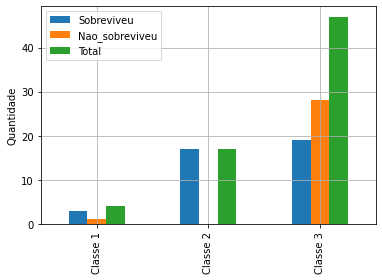

In [67]:
# plotando o dataframe acima
df_criancas.plot(kind = 'bar')
plt.ylabel('Quantidade')
plt.grid()
plt.show()

In [68]:
# percentual de crianças sobreviventes e não sobreviventes por classe
percentual_criancas_sobreviventes = (criancas_sobreviventes/total_criancas_classe) * 100
percentual_criancas_nao_sobreviventes = (criancas_nao_sobreviventes/total_criancas_classe) * 100
df_percentual = pd.concat([percentual_criancas_sobreviventes, percentual_criancas_nao_sobreviventes], axis = 1).fillna(0).round(0)
df_percentual.columns = ['% de Sobreviventes', '% de não sobreviventes']
df_percentual

,% de Sobreviventes,% de não sobreviventes
1,75.0,25.0
2,100.0,0.0
3,40.0,60.0


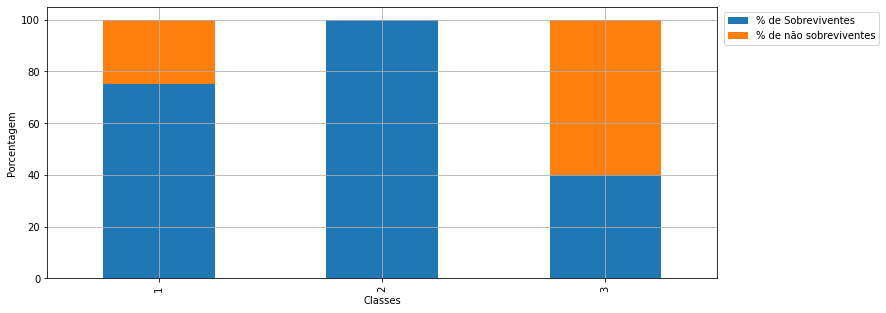

In [69]:
# plotando em gráfico de barras os percentuais de crianças sobreviventes e não sobreviventes
df_percentual.plot(kind = 'bar', stacked = True, figsize = (12,5)).legend(bbox_to_anchor = (1.25,1))
plt.xlabel('Classes')
plt.ylabel('Porcentagem')
plt.grid()
plt.show()